## Implementation and comparison of K-nearest neighbors (KNN) and convolutional neural network (CNN) for clothes recognition
#### Data Analysis MoBi SoSe2023, Topic 01: Image Analysis
#### Tutor: Hannah Winter
#### Team 04: Ole Decker, Heinrike Gilles, Bastian Mucha, Anastasia Warken
#### July 2023


## Abstract

In this work, the image classification algorithms K-nearest neighbors (KNN) and Convolutional Neural Network (CNN) were investigated and compared by testing both on the Fashion-MNIST dataset, featuring images of different clothing items of 10 categories. The preparation of the dataset included performing a Z-transformation and data dimension reduction using Principal Component Analysis (PCA). The optimal amount of variance and number of k for KNN was determined. To improve KNN efficiency, KD-Trees were implemented. The performance of the two algorithms were compared and evaluated. The CNN yielded a higher accuracy compared to the KNN, although the KNNs accuracy was relatively high. These results met the expectations, since KNN is a basic algorithm, while CNN is a modern, state-of-the-art deep learning model. 
In a modified confusion matrix it was found, that in both algorithms the categories "T-Shirt/Top" and "Shirt" were often wrongly classified. In an attempt to overcome this confusion a CNN was implemented grouping these two classes together followed by a seperate CNN only classifying between the categories "T-Shirt/Top" and "Shirt". This however did not yield a higher accuracy.

## Table of contents
1. Introduction <br>
2. Material <br>
    2.1 Imports <br>
    2.2 Dataset <br>
3. Methods <br>
    3.1 Z-transformation <br>
    3.2 Principal Component Analysis (PCA) <br>
    3.3 K-nearest neighbors (KNN) <br>
    3.4 KD-Trees <br>
    3.5 Convolutional Neural Network (CNN) <br>
    3.6 Evaluation methods <br>
4. Results <br>
    4.1 PCA <br>
    4.2 Optimal number of k and PCs <br>
    4.3 Comparing conventional KNN and KNN with KDTrees <br>
    4.4 Comparing KNN and CNN <br>
    4.5 Shirt and T-Shirt/Top problem <br>
5. Discussion

## Introduction

Whether it is Zalando, Amazon or Shein, the online fashion market is continously growing. In 2023, predictions say the global fashion e-commerce market will surpass a value of 820 billion U.S. dollars. *(Statista, 2023)*
Images of clothing for training of deep learning are available in sufficient quantity. The Zalando Fashion-MNIST dataset serves as an optimal tool for for benchmarking machine learning algorithms. It is a balanced dataset comprised of 60,000 training images and 10,000 test images. *(Xiao et. al., 2017)*
This dataset is a replacement for the original MNIST dataset consisting of images of hand-written digits. *(LeCun et. al., 1989)*

In this project the classification algorithms K-nearest neighbors (KNN) and Convolutional Neural Network (CNN) algorithms were implemented and compared. The first one being a simple, but effective standard machine learning algorithm, while the Convolutional Neural Network algorithm is a complex modern attempt of imitating the neural structure of the visual cortex. *(Taunk et. al, 2019, Uhrig 1995)*
Prior to applying the algorithms to the dataset, preprocessing was performed in the form of normalization of the data and dimensional reduction using principal component analysis (PCA).<br>
The KNN algorithm algorithm organizes the data into cohesive clusters or subsets and categorizes newly inputted data by comparing it to previously trained data. The input is assigned to the class that shares the highest similarity with its nearest neighbors. 
*(Taunk et. al, 2019)*
CNN belongs to the artificial neural networks and is specialized in image analysis. Convolutions are applied to the images in order to recognize patterns. This technique can be used for classification problems, as it is done in this project. 
*(Uhrig 1995)*

## Material

#### Imports

For coding, optimization and visualization several functions from the packages numpy, pandas, seaborn, matplotlib and tensorflow keras were used.
An overview over all libraries used can be found in the imports.yml file.

#### Dataset

The dataset applied is Zalandos Fashion-MNIST dataset. MNIST stands for Modified National Institute of Standards and Technology database. The dataset consists of 70,000 images of Zalando clothing articles and is often used for benchmarking machine learning algorithms. Each image has the size of 28 x 28 pixels in grayscale and has been categorized into one of 10 classes, which include T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag and Ankle boot. The dataset is split into a training set containing 60,000 images and a test set comprising 10,000 images. The dataset is in form of a CSV file (comma separated value). Each row contains the information for one image. The first column of values consists of the class of each image ranging from 0 to 9, the following columns are the intensity values of each pixel, varying between 0 and 255.
These are 100 example images of the clothing items. 
All items fill the image to a comparable extend and the item is located in the center of the image.
*(Xiao et. al., 2017)*
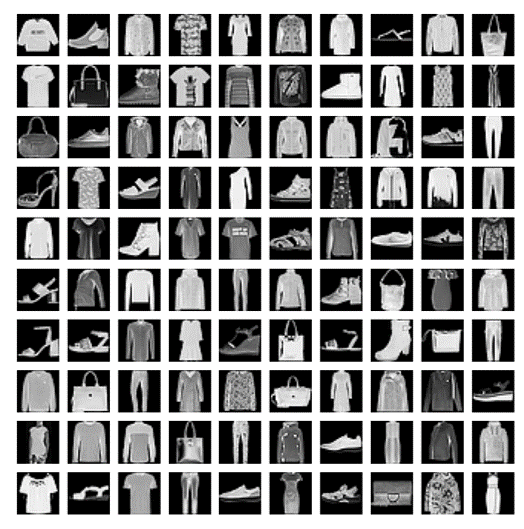

## Methods

#### Z-transformation
A Z-transformation is a statistical technique used to standardize and normalize data. It transforms a dataset into a standard normal distribution with a mean of 0 and a standard deviation of 1. It is performed by subtracting the mean of the dataset from each datapoint and then dividing it by the standard deviation. 
The Z-Transformation is applied to the intensity value of each pixel of each image, in order to improve performance and convergence of our KNN and CNN. Standardizing the pixel intensities helps to avoid certain features dominating the learning process, e.g. high intensity pixels in the background of the images. Normalizing the data improves pixel comparability. *(Jury, 1965)*

#### PCA
A Principal Component Analysis (PCA) is a method used to reduce the dimensions of a high dimensional dataset while preserving the most information and minimizing the loss of variance. This technique is done as a preparation to make a machine learnig process more efficient by reducing redundancy.
To perform a PCA a covariance matrix is calculated using the Z-transformed dataset. The covariance matrix gives the relationship of each pixel intensity value of all images, each row being an eigenvector. The eigenvalues are calculated using the covariance matrix. Each eigenvalue corresponds to an eigenvector and represents the explained variance of this vector. The larger the eigenvalue, the more variance is captured along that eigenvector or principal component. <br>
The final step in a PCA is to choose the percentage of variance the data is supposed to describe and then removing all redundant Principal Components.
We implemented PCA using NumPy by computing a covariance matrix using the Z-transformed data and then calculating the eigenvalues. <br>
These were then resorted in ascending order by absolute value, since eigenvalues can have positive or negative values, where only the absolute holds the information of amount of variance explained. *(Géron, 2019)*

#### K-nearest neighbors (KNN)
K-nearest neighbors (KNN) is a non-parametric, supervised learning algorithm. In the context of our project it was used for classification. The KNN makes predictions based on the similarity of input data points to their neighboring data points by measuring the distance to all reference points and then finding the k nearest points. Euclidean distance was used. The class of the test data point is assigned by a so-called majority vote, meaning the class the majority of the nearest points have is selected. 

KNN belongs to the family of lazy-learning models. The algorithm stores the entire training dataset and uses it as reference for each testing data point instead of undergoing a training phase. As a consequence the run time is long, compared to algorithms that feature a training phase.
To calculate the k nearest neighbors the size of k has to be determined. To find the optimal k the proof by exhaustion method was applied. The KNN was run with different numbers for k 
and then the performance was measured. Subsequently the value for k with the highest accuracy was chosen. Normally this method is done using a validation data set, but in this case the test data set was used directly. <br>

The goal of the KNN was to classify images of clothing items, by comparing each test image with all images from the training data set and then comparing the predicted labels to the actual classification. The closest neighbors of the sample image were determined based on the smallest difference in intensity values between the images. *(Taunk et. al, 2019; Géron, 2019)*

#### KD-trees
Since the KNN algorithm is not very time efficient due to it's way of operating, k-dimension trees or KD-trees are a tool to use clever data structures to optimize the classification process. K is defined by the number of properties each data point has, in this context it is the dimensions, so it corresponds to the number of PCs selected.
The concept is based on the repeated division of the space along the median value of one of the dimensions. This can be shown in a binary tree structure. Each node is a splitting hyperplane, which is defined by one of the axis. The training points are divided in the tree based on whether the coordinate value for that axis is larger or smaller.
In which order the axes are chosen during division is commonly to rotate through each of the dimensions.
How many partitions of the space are made can be chosen by changing the leaf size. The leaf size is the maximal number of data points that can be contained in a final node at the bottom of the KD-tree. A smaller leaf size generates a larger tree with more partitions, making the construction time longer, a larger leaf size can result in an unbalanced tree and slow down the search time. However the leaf size does not affect the result of the query. <br>
To find the nearest neighbors of the test point the tree is traced from top to bottom following the shortest distance found so far. To check at the bottom of the tree whether there is a closer point in another branch of the tree, recursion takes place. The distances to the previous division axes are calculated and then the child nodes will be checked for closer neighbors. This is done until the distance to the division axis exceeds the distance to the previously found closest neighbor. When the height of the tree is n, a maximum of 2n nodes will be checked in recursion for a smaller distance to the test data point. *(Bentley, 1975)*

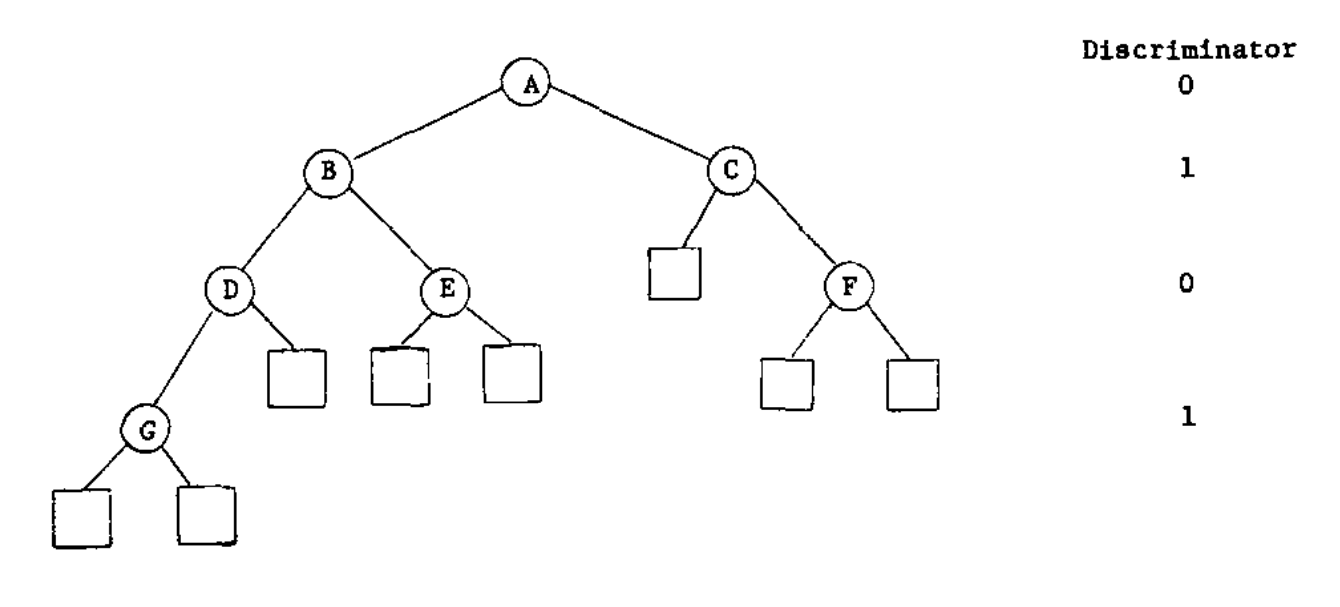
*(Bentley, 1975)*

#### Convolutional Neural Network (CNN)
 
A convolutional neural network is a deep learning model based on the concept of an artificial neural network. It is mainly used for the analysis of visual data like images or videos, because it works by detecting patterns in an hierarchical structure. A CNN consists of different types of layers: convolutional layer, activation layer, pooling layer, fully connected layer, dropout layer and batch normalization layer. Not all these layers will be explained here. The most important are the convolutional layers. Each layer can consist of multiple convolutional filters. A filter is a small matrix with a defined number of rows and columns. It convolves over all blocks of pixels of the input image. The product of the filter is passed on to the next layer. The filters are what detects the patterns. These become more and more sophisticated the deeper the network becomes. For example the filters in the first convolutional layer may only detect edges, while a filter in a deeper layer  recognizes complex shapes. <br>
The convolutional layers set a CNN apart from other neural networks. Perks of a CNN are that not all layers are fully connected, making it faster than a conventional neural network when using images with many pixels. Also the features of an image are detected in the context of the surrounding pixels and not by their absolute intensity values, meaning for example edges are recognized as edges regardless of their brightness. Another advantage is that convolutional filters are trainable to be able to recognize different features and patterns.
After each convolution layer a nonlinear activation function is applied. It determines which neurons are activated in the CNN. 
This way complex relationships betwen the input data and desired output can be modeled. 
A standard activation function in CNN is ReLU, standing for Rectified Linear Unit. This function outputs the input directly if it is positive, and zero otherwise. <br>
The pooling layers reduce the spatial dimensions of the input image to reduce the number of parameters and the computational load. It condenses the features in a region and summarizes it, which makes it more robust to variations of feature-position within the images. Most commonly used is the max pooling. The output layer then features only the maximum elements of all regions, translating to the most prominent features. *(Uhrig, 1995; Géron, 2019; Heaton, 2018)*

#### Evaluation methods

To measure and compare the performance and effectiveness of the classification algorithms, the accuracy and confusion matrix were chosen as evaluation methods. 
The accuracy gives the percentage of how many images were classified correctly. This evaluation method gives a good overview how well the algorithm is working, 
but to get a deeper insight into common misclassifications, an enhanced version of a confusion matrix was used. A confusion matrix compares the predicted class of the objects to the actual class. In the cells the number of objects that fall into that category are given. (Géron, 2019)
To make our KNN & CNN confusion matrix more comparable, we substracted the expected values of the confusion matrix from the observed values. Expected values means the values that would be observed if the algorithm was unbiased and each class could be detected just as good as every other class. 

## Results

#### PCA

PCA was successfully implemented. We implemented the PCA using only Numpy. The PCA yields 784 different Eigenvectors. 


#### Optimal number of k and PCs
After successful data preparation and implementation of KNN, the optimal number of principal component variance and number of neighbors was determined by running KNN for ks between 2 and 15 for the principal component variances 0.25, 0.5, 0.75, 0.8, 0.85, 0.9, 0.95 and 1. 

<img src="../Plots/projectsummary.png" width=600>

The colors indicate the principal component variance. The x-axis indicates the number of k, the y-axis the accuracy. 
The accuracy, that was achieved with the CNN is indicated as a line.

This indicates, that the optimal combination of number of ks and principal component variance is k = 4 and var = 0.95. These values refer to the KNN. For the CNN a 100% of variance was used and no number of k is needed. 


#### Comparing conventional KNN and KNN with KDTrees

KD-Trees were implemented with a leaf size of 10. This parameter corresponds to the number of points that can be in a designated divided space in the tree. The lower the leaf size, the deeper the tree - since creating deep but inefficient trees is redundant, the optimal leaf size was determined. 

For classification, the KD-Tree algorithm yielded a running time of approximately 22.8 seconds for a leaf-size of 10. The original KNN function is not far behind with a running time of approximately 26.4 seconds. 

The KD-Tree algorithm was then timed for the leaf sizes 1, 10, 20, 50 and 100. The different leaf sizes yielded very similar running times with the best running time achieved with a leaf size of 50. 


#### Comparing KNN and CNN
CNN was implemented using a modified vgg model [citation here]. 

[Insert Bild von complex model architektur]

The yellow layers mark the convolution layers. The red layers mark the pooling layers, the turquoise ones the batch normalization. 
Light blue is a flattening layer, dark blue are fully connected layers and the yellow layers at the end mark the neuron dropout layers. 

We used two classification methods to compare the KNN to the CNN: accuracy and confusion matrices.T he accuracy for the CNN was much higher, yielding 0.929, whereas the KNN only yielded an accuracy of 0.8625.

For visualization purposes we repeated the same neural network using the Handwritten Digits MNIST Dataset [[citation here]], resulting in an accuracy score of 0.99.

<img src="../Plots/knn_confusionmatrix2.svg" alt="Vector Graphic" width="400">

The KNN confusion matrix shows the assigned labels on the y-axis and the predicted labels on the x-axis. The diagonal visualizes the number of images that were classified correctly. It is important to note, that t-shirts/tops were especially often confused with shirts and vice-versa, some confusion also arises within the classes coat and pullover, where these classes are also often confused with shirts and t-shirts/tops. Surprisingly, the classes ankle boot, sneaker and sandal were distinguished very well.

<img src="../Plots/cnn_confusionmatrix2.svg" alt="Vector Graphic" width="400">

The CNN condfusion matrix shows the assigned labels on the y-axis and the predicted labels on the x-axis. The CNN encountered similar problems to the KNN, where shirts were often confused with T-shirts and tops. Interestingly, the reverse isn't as common. While present, all other confusions were reduced compared to the KNN confusion.

We modified both confusion matrices, where instead of showing the absolute number of assigned labels the elements ((insert explanation here!))

<img src="../Plots/knn_chi.svg" width=400>

The modified confusion matrix for the KNN shows...


<img src="../Plots/cnn_chi.png" width=400>

The modified confusion matrix for the CNN shows...



#### Shirt and T-Shirt/Top problem
In order to further investigate the confusion happening between shirts and t-shirts, we modified the dataset to summarize the classes 't-shirt/top' and 'shirt' into one class. Then we compared the two confusion matrices. 


<img src="../Plots/cnn_confusionmatrix3.svg" width=400 >
<img src="../Plots/cnn_confusionmatrixshirtssum.svg" width=400 >

((kann jemand das alignen? sonst eif raus machen danke))

Since there are twice as many data points for the summarized class T-shirt / top, the diagonal shifts colors slightly for the diagonal of all other classes. Regarding the confusion with other classes the confusion is generally the same or lower with exception of dresses which seem to be confused more often when the classes are not summarized. ((In diskussion darauf eingehen.))

Summarizing the classes yielded an accuracy of 0.940, which is higher than the accuracy the CNN with all 10 classes produced.

Then an attempt was made to seperately train and combine two neural networks: One classifies all classes with exception of shirts and t-shirts, the other classifies only shirts and t-shirts. The latter achieved an accuracy of 0.88, combining the two neural networks lead to an accuracy of 0.921. 

We compared the accuracy of only classifying shirts and t-shirts/tops with the accuracy of a human classifying the images manually. 100 images of shirts and t-shirts/tops were manually classified, yielding a human accuracy score of 0.81.



## Discussion

All steps for clothing classification for both KNN and CNN were implemented successfully. The KNN reached an accuracy of 86.3% , while CNN achieved an accuracy of 92.9%. The KNN performed better than expected, given the much lower complexity of the algorithm. 

The algorithms were run using 95% of variance and the KNN used the 4 nearest neighbors to predict the class for the test data point, because these resulted in the highest accuracy when testing different parameters. 
Since the KNN does not have a training phase, but instead compares each test point to the entire training data set, the run time is <span style="color:red"> hier run time einfügen </span>. Due to the operation method the KNN was only able to handle the size of the test data set, when the distances calculations were done in batches. A batch size of 50 was selected. To speed up the algorithm a KD-tree was implemented bringing the run time down to 26,.9 seconds using a leaf size of 50.

The errors of the KNN are not uniformly distributed across the classes. This can be seen in the modified confusion matrix. 202.9 more Shirts were wrongly classified as T-Shirts/ Tops than expected when having an accuracy of 86.3%. This was the most common type of misclassifcation. It would be logical to expect a high number of T-Shirts/ Tops being classified as Shirts as well, but this is not the case. Only 54.3 more misclassifications occurred than expected with an evenly spread error rate. This can be explained by the decision of the majority vote of the KNN, when there is a tie between 2 classes. In this case the class with a lower value gets chosen. T-Shirts/ Tops are the first class, so value 0, while Shirts correspond to the classification value of 6. When there was a tie whether an image should be classified as T-Shirt/ Top or Shirt, the category T-Shirt/ Top was always chosen. Other common misclassifications were between Pullovers and Coats, Pullovers and Shirts, as well as Shirt and Coat. 

The duration of the training phase of the CNN took between 30 and 60 minutes. The classification then only needed 2 seconds. 
Aditionally to the Fashion-MNIST data set, the CNN was run with the original MNIST data set consisting of images of handwritten digits. With this data set an accuracy of 99% was obtained, because the images are simpler and better to distinguish. <br>
Since neural networks operate as a sort of black box, finding a rational way to choose an architecture is quite difficult. We decided to start the traditional and simple LeNet-5 architecture since its low training time made testing of hyperparameters easy. As a more state of the art approach we also modified the deeper VGG model since it consists of many simple layers and is thus powerful but still comparibly easy to understand. These architectures were useful for learning the basics of using tensorflow keras but more complex architectures will likely yield better results with the same runtime.
The CNN, just like the KNN, disproportionately often predicted Shirts to be T-Shirts/ Tops. 
Comparison of the two modified confusion matrices of KNN and CNN leads to the supposition that there are certain labels closely related to eachother, because they share the same assignment errors through different evaluation methods.
As an attempt to achieve a higher accuracy than 92.9% and reduce the misclassification between T-Shirts/ Tops and Shirts two CNNs were staggered. In the first one the classes T-Shirt/ Top and Shirt were combined and in the second one all images that had been given that class, were then classified separately. Notably, this did not enhance the accuracy, but instead lowered it to 92.1%. A likely reason for that is that the differences between these two classes are minimal and in the normal 10 class CNN all differences in patterns were already detected, training a seperate network would be therefore useless. This explanation is supported by the human accuracy of only 81%, meaning these two classes are hardly differentiable. 

Overall both algorithms performed well in classification of the clothing images. As expected the CNN yielded a higher accuracy. The two classes T-Shirt/ Top and Shirt were often wrongly classified, which our team was not able to overcome by adapting the CNN. 

## Bibliography

1. Statista (2023). Fashion e-commerce market value worldwide from 2023 to 2027
2. Xiao, H., Rasul, K., Vollgraf, R. (2017). Fashion-mnist: a novel image dataset for benchmarking machine learning algorithms.
3. LeCun, Y., Boser, B., Denker, J., Henderson, D., Howard, R., Hubbard, W., and Jackel, L. (1989). Handwritten digit recognition with a back-propagation network. Advances in neural information processing systems 2.
4. Taunk, K., De, S., Verma, S., and Swetapadma, A. (2019). A Brief Review of Nearest Neighbor Algorithm for Learning and Classification. 2019 International Conference on Intelligent Computing and Control Systems (ICCS), 1255-1260.
4. Uhrig, R.E. (1995). Introduction to artificial neural networks. 6-10 Nov. 1995. pp. 33-37 vol.31.
5. Jury, E.I. (1965). Theory and application of the z-transform method.
6. Géron, A. (2019). Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow (O'Reilly Media, Inc.).
7. Bentley, J.L. (1975). Multidimensional binary search trees used for associative searching. Commun. ACM 18, 509–517.
8. Heaton, J. (2018). Ian Goodfellow, Yoshua Bengio, and Aaron Courville: Deep learning. Genetic Programming and Evolvable Machines 19, 305-307.
